In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../datasets/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# checking for duplicate values
df.duplicated().sum()

1

In [5]:
# removing duplicate values from DataFrame
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(302, 14)

In [7]:
# counting target variable class samples
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

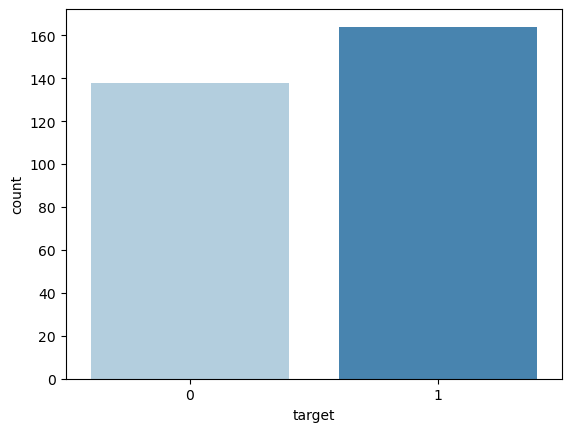

In [8]:
# target classes visualization
sns.countplot(x='target', data=df, palette='Blues')

In [9]:
# First step of PCA for dimesionality reduction is standard normalization.
# (checking if features follow a gaussian distribution where mean=0, std=1),
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [10]:
# all values are converted to the same scale
scaled_data = scaler.transform(df)

In [11]:
# scaled data
scaled_data

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -0.71491124,
        -2.1479552 ,  0.91731315],
       [-1.92854796,  0.68265615,  1.005911  , ..., -0.71491124,
        -0.51399432,  0.91731315],
       [-1.48572607, -1.46486632,  0.0353515 , ..., -0.71491124,
        -0.51399432,  0.91731315],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ...,  1.27497996,
         1.11996657, -1.09014026],
       [ 0.28556146,  0.68265615, -0.93520799, ...,  0.28003436,
         1.11996657, -1.09014026],
       [ 0.28556146, -1.46486632,  0.0353515 , ...,  0.28003436,
        -0.51399432, -1.09014026]])

In [12]:
# shape of scaled data
scaled_data.shape

(302, 14)

In [13]:
# PCA for dimensionality reduction

# n_components=2 means we convert number of features to 2
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components 
# such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(n_components=6, svd_solver='full')
pca = PCA()

In [14]:
# fitting the PCA instance
pca.fit(scaled_data)

PCA()

In [15]:
# transforming scaled data so that we reduce number of features
x_pca = pca.transform(scaled_data)

In [16]:
# checking the shape for the scaled data and PCA respectively
scaled_data.shape, x_pca.shape

((302, 14), (302, 14))

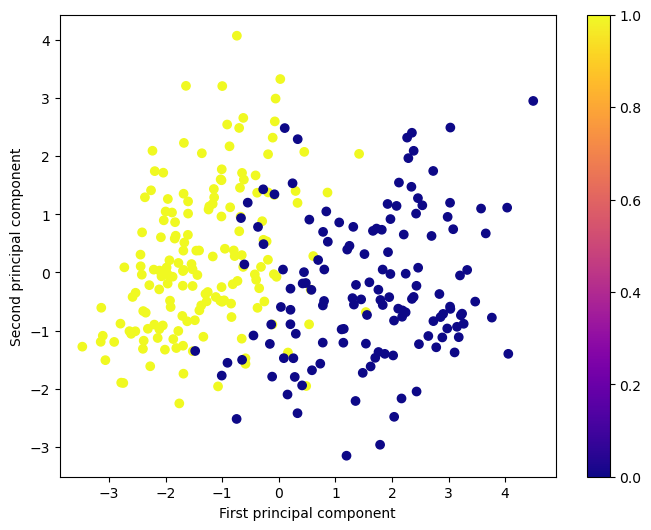

In [17]:
# plotting the first two dimensions
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df["target"], cmap="plasma")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()

In [18]:
# defining independent variables and target variable
X = x_pca
y = df["target"]

In [19]:
X.shape, y.shape

((302, 14), (302,))

In [20]:
# splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [21]:
# decision tree classifier
classifier = DecisionTreeClassifier()

In [22]:
# fitting the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# predicting the outcome for testing data
y_pred = classifier.predict(X_test)

In [24]:
# measuring accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9836065573770492


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        29

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



/Users/momanyibiffon/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


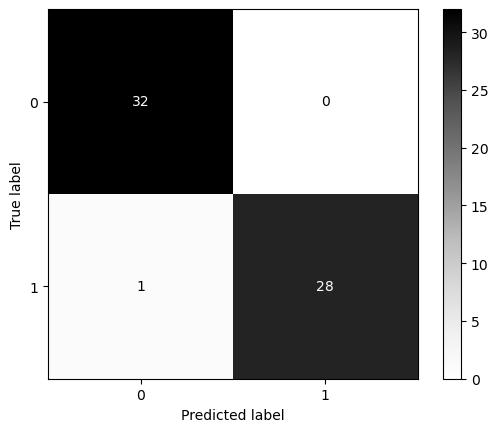

In [26]:
print(plot_confusion_matrix(classifier, X_test, y_test, cmap="Greys"))

Component: 1
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.81      0.85      0.83        26

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

********************
Component: 2
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.77      0.92      0.84        26

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

********************
Component: 3
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        35
           1       0.83      0.92      0.87        26

    accuracy  

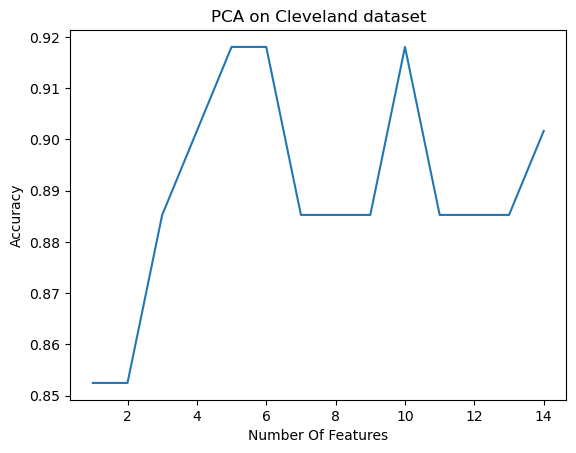

In [33]:
# finding the best number of components after oversampling with SMOTE
components = []
accuracies = []
for component in range(1,15):
    pca = PCA(n_components=component)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    X = x_pca
    y = df["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    classifier = DecisionTreeClassifier().fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    components.append(component)
    accuracies.append(accuracy)
    print("Component:",component)
    print("Accuracy:",accuracy)
    print(classification_report(y_test, y_pred))
    print("********************")
    
#We can see the best number of features
plt.title("PCA on Cleveland dataset")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(components, accuracies)
plt.show()